# Trabalho: Análise de Sentimento

## Alan Pádua e Lucas Santos

1 - Classificar sentimento (positivo e negativo) na base de tweets a ser fornecida utilizando 3 métodos diferentes: 
- Dois métodos clássicos 
- Um método utilizando deep learning 


2 - Um método consiste em uma forma de vetorização (Contagem, vetor binário, TF-IDF, Embeddings, etc.) e um classificador 


3 - O grupo deverá comentar um pouco sobre os métodos utilizados (comentar sobre a vetorização e sobre o classificador) e fazer uma análise de cada método: 
- Acurácia 
- Precision 
- Recall 
- F-measure (F1 Score) 


4 - Fazer comparativo dos métodos utilizando os critérios acima. 
Qual o melhor? 
O que pode melhorar? 
Quais as vantagens e desvantagens de cada método. 


5 - O trabalho deve ser obrigatoriamente apresentado. Haverá sorteio do dia da apresentação e a ordem. 
No dia da apresentação, o grupo terá 15 min para apresentar o trabalho (será utilizado compartilhamento de tela com o grupo). 
O grupo pode utilizar qualquer recurso para facilitar a apresentação (slides, trechos de códigos, etc.)

# 1- Carregar Dados

## Importar Bibliotecas

In [1]:
from TratarDados import TratarDados
from VisualizarDados import VisualizarDados
from Treinamento import Treinamento
from DeepLearning import DeepLearning

from wordcloud import WordCloud
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

visualizar_dados = VisualizarDados()
tratar_dados = TratarDados()
treinamento = Treinamento()
deep_learning = DeepLearning()


2021-08-16 18:40:52.397968: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-16 18:40:52.397991: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Importar dados do CSV

In [2]:
# tweets = tratar_dados.importar_parcial(1000)
tweets = tratar_dados.importar_csv()
tweets.head()

,Sentimento,Data,Usuario,Texto
0,0,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
2,0,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
4,0,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
tweets['Sentimento_Texto'] = tweets['Sentimento'].replace([0, 4, 2],['negativo', 'positivo', 'neutro'])
tweets['Sentimento'] = tweets['Sentimento'].replace([0, 4],[0,1])


# tweets = tweets[['Texto', 'Sentimento']]
tweets.drop(['Data','Usuario'], axis=1, inplace=True)

tweets['Texto'] = tweets['Texto'].str.lower()

In [4]:
# Verificar nulos
print('Verificar Nulos\n', tweets.isnull().sum())

# Shape
print('Shape\n', tweets.shape)

Verificar Nulos
 Sentimento          0
Texto               0
Sentimento_Texto    0
dtype: int64
Shape
 (1600000, 3)


In [5]:
tweets.head()

,Sentimento,Texto,Sentimento_Texto
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",negativo
1,0,is upset that he can't update his facebook by ...,negativo
2,0,@kenichan i dived many times for the ball. man...,negativo
3,0,my whole body feels itchy and like its on fire,negativo
4,0,"@nationwideclass no, it's not behaving at all....",negativo


# 2- Tratar Dados

## Removendo carater's especiais e estaços extras

In [6]:
%time tweets = tratar_dados.preprocess_reviews(tweets)

CPU times: user 30.5 s, sys: 80.5 ms, total: 30.6 s
Wall time: 30.6 s


## Visualizando os dados com WordCloud

In [7]:
nuvem_palavras = tratar_dados.criar_nuvem_palavras(dados=tweets, campo="Texto")


In [8]:
# nuvem_palavras          = tratar_dados.criar_nuvem_palavras(dados=tweets, campo="Texto")
nuvem_palavras_positivo = tratar_dados.criar_nuvem_palavras(dados=tweets.query("Sentimento_Texto == 'positivo'"), campo="Texto")
nuvem_palavras_negativo = tratar_dados.criar_nuvem_palavras(dados=tweets.query("Sentimento_Texto == 'negativo'"), campo="Texto")

### Nuvem palavras **Geral**

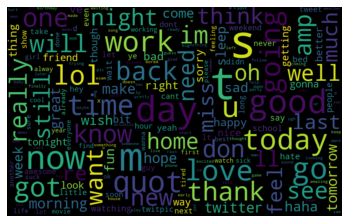

In [9]:
visualizar_dados.visualizar_word_cloud(nuvem_palavras)

### Nuvem palavras **Positivas**

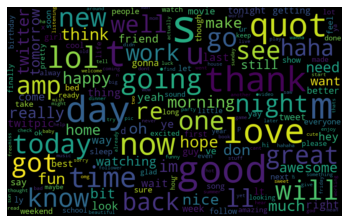

In [10]:
visualizar_dados.visualizar_word_cloud(nuvem_palavras_positivo)

### Nuvem palavras **Negativas**

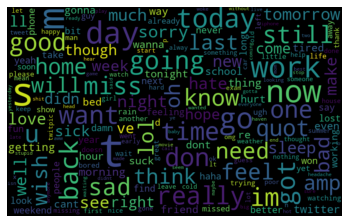

In [11]:
visualizar_dados.visualizar_word_cloud(nuvem_palavras_negativo)

## Remove Stop words

### Antes de remover Stop Words

In [12]:
tweets.head()

,Sentimento,Texto,Sentimento_Texto
0,0,switchfoot http twitpic com 2y1zl awww t...,negativo
1,0,is upset that he can t update his facebook by ...,negativo
2,0,kenichan i dived many times for the ball man...,negativo
3,0,my whole body feels itchy and like its on fire,negativo
4,0,nationwideclass no it s not behaving at all ...,negativo


In [13]:
tweets['Texto'] = tratar_dados.remover_stop_words(tweets, 'Texto')


### Após de remover Stop Words

In [14]:
tweets.head()

,Sentimento,Texto,Sentimento_Texto
0,0,switchfoot http twitpic com 2y1zl awww bummer ...,negativo
1,0,upset update facebook texting might cry result...,negativo
2,0,kenichan dived many times ball managed save 50...,negativo
3,0,whole body feels itchy like fire,negativo
4,0,nationwideclass behaving mad see,negativo


## Visualizar nuvem de palavras após remover Stop Words

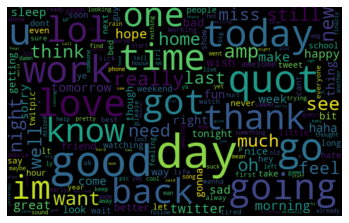

In [15]:
nuvem_palavras = tratar_dados.criar_nuvem_palavras(dados=tweets, campo="Texto")

visualizar_dados.visualizar_word_cloud(nuvem_palavras)


## Visualizar nuvem de palavras após remover abreviações comuns e algumas palavras irrelevantes

palavras_removidas = 'amp|today|tomorrow|going|girl|tonight|getting|day|get|http|com|go|one|lol|quot|im|od|new|u|twitter|nna|u|&|&quot|t|e|s|2|o|a|p|fn'


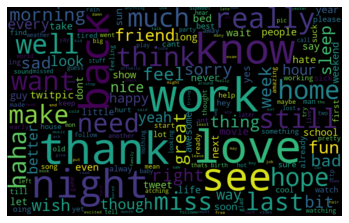

In [16]:
tweets['Texto'] = tweets['Texto'].apply(lambda x: tratar_dados.process_tweets(x))
nuvem_palavras  = tratar_dados.criar_nuvem_palavras(dados=tweets, campo="Texto")

visualizar_dados.visualizar_word_cloud(nuvem_palavras)

# 3- Separando dados de teste e treinamento

## Vetorização

Foi utlizado o método **vetorizar, bag_of_words = treinamento.vetorizar(tweets, 'Texto')** para vetorizar que utiliza o CountVectorizer do sklearn.

O **CountVectorizer** é o responsável por fazer a vetorização dos dados de texto e transformá-los em uma matriz de frequência.

Com a **Vetorização** criei o **Bag-Of-Words** para realizar a análise dos sentimentos.

In [17]:
vetorizar, bag_of_words = treinamento.vetorizar(tweets, 'Texto')
X_treino, X_teste, y_treino, y_teste= treinamento.separar_dados_treinamento(bag_of_words.toarray(), tweets.Sentimento)


In [18]:
print(vetorizar.get_stop_words())
print(vetorizar.get_feature_names())

frozenset({'never', 'un', 'along', 'anywhere', 'not', 'system', 'name', 'are', 'much', 'this', 'of', 'too', 'seems', 'the', 'hereupon', 'what', 'ourselves', 'but', 'becomes', 'elsewhere', 'yourselves', 'though', 'such', 'become', 'nowhere', 'up', 'be', 'afterwards', 'whereafter', 'sometime', 'third', 'being', 'con', 'beforehand', 'is', 'has', 'you', 'found', 'towards', 'eg', 'eleven', 'anything', 'hereafter', 'detail', 'he', 'have', 'her', 'must', 'our', 'serious', 'interest', 'herein', 'onto', 'any', 'where', 'fifty', 'than', 'except', 'ie', 'couldnt', 'under', 'once', 'during', 'almost', 'every', 'within', 're', 'now', 'here', 'none', 'those', 'thereupon', 'both', 'via', 'move', 'two', 'cry', 'itself', 'eight', 'these', 'latterly', 'beyond', 'enough', 'five', 'former', 'had', 'describe', 'full', 'around', 'over', 'show', 'whenever', 'wherever', 'everyone', 'yours', 'otherwise', 'thin', 'whoever', 'anyway', 'therefore', 'well', 'themselves', 'few', 'an', 'would', 'myself', 'alone', 'o

In [19]:
X_treino

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# 4 - Classificar sentimento (positivo e negativo) na base de tweets a ser fornecida utilizando 3 métodos diferentes: 

## Métricas
- **Acurácia:** <br />
Indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente;

<br />

- **Precision:** <br />
Dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas;

<br />

- **Recall:** <br />
Recall/Revocação/Sensibilidade: dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas

<br />

- **F-measure** (F1 Score): <br />
Média harmônica entre precisão e recall.

## Dois métodos clássicos 


### Logistic Regression

A regressão logística é uma técnica estatística que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, a partir de uma série de variáveis explicativas contínuas e/ou binárias.

In [20]:
print('X_treino,   X_teste,  y_treino, y_teste')
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)


X_treino,   X_teste,  y_treino, y_teste
(1120000, 50) (480000, 50) (1120000,) (480000,)


In [21]:
predicao_regressao = treinamento.logistic_regression(X_treino, y_treino, X_teste, y_teste)
print("Accuracy : %s" % (np.round(accuracy_score(y_teste, predicao_regressao), 4)))

Accuracy : 0.594


In [22]:
classificacao_reg, score_reg = treinamento.metricas(y_teste, predicao_regressao)
print("Regressão Logistica")
print("Classificação: \n", classificacao_reg)
print("Score:", score_reg)
print("\n")


Regressão Logistica
Classificação: 
               precision    recall  f1-score   support

           0       0.57      0.80      0.66    239361
           1       0.66      0.39      0.49    240639

    accuracy                           0.59    480000
   macro avg       0.61      0.59      0.58    480000
weighted avg       0.61      0.59      0.58    480000

Score: 0.5945537755953508




### Naive Bayes

A principal característica do algoritmo, e também o motivo de receber “naive” (ingênuo) no nome, é que ele desconsidera completamente a correlação entre as variáveis (features). Ou seja, se determinada fruta é considerada uma “Maçã” se ela for “Vermelha”, “Redonda” e possui “aproximadamente 10cm de diâmetro”, o algoritmo não vai levar em consideração a correlação entre esses fatores, tratando cada um de forma independente.

In [23]:
predicao_naive_bayes = treinamento.naive_bayes(X_treino, y_treino, X_teste, y_teste)
print("Accuracy : %s" % (np.round(accuracy_score(y_teste, predicao_naive_bayes),4)))

Accuracy : 0.5933


In [24]:
classificacao_nb, score_nb = treinamento.metricas(y_teste, predicao_naive_bayes)
print("Naive Bayes")
print("Classificação: \n", classificacao_nb)
print("Score:", score_nb)

Naive Bayes
Classificação: 
               precision    recall  f1-score   support

           0       0.56      0.81      0.67    239361
           1       0.67      0.38      0.48    240639

    accuracy                           0.59    480000
   macro avg       0.62      0.59      0.57    480000
weighted avg       0.62      0.59      0.57    480000

Score: 0.5938685613629313


## Um método utilizando Deep Learning 

### Camadas 

-- Função Relu: A reta ReLu de cor verde claro com azul, é a única que tem um comportamento linear. Contudo, a natureza dela é não linear, representando valores entre 0 e +inf. (Uma vantagem dela, é em termo de desempenho computacional.)

Atualmente, a maioria dos aplicativos de aprendizado profundo usa ReLU em vez de funções de ativação logística para visão computacional, reconhecimento de fala, processamento de linguagem natural e redes neurais profundas, etc.


-- Função Logística ou Sigmoid: A linha azul e verde se referem a Logística Regressão ou Sigmoid . A resposta sempre será entre 0 ou 1, normalmente usada para problemas de predição da probabilidade já que é de se esperar valores no mesmo intervalo.

### Optimizer

-- ADAM
Adaptive Moment Estimation (Adam): é método que calcula as taxas de aprendizado adaptativo para cada parâmetro. Além de armazenar uma média exponencialmente decadente de gradientes quadrados anteriores como Adadelta e RMSprop, Adam também mantém uma média exponencialmente decadente de gradientes anteriores, semelhante ao momento. 



In [25]:
# Definindo o modelo de camadas Deep Learning
model = deep_learning.definir_modelo(shape=(50,))

# Compilando o modelo
deep_learning.compilar_modelo(model)

# Treinando o modelo
history = deep_learning.treinar_modelo(model, X_treino, y_treino, X_teste, y_teste)


2021-08-16 18:52:34.598093: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-16 18:52:34.598111: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-16 18:52:34.598124: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (alan-Inspiron-3583): /proc/driver/nvidia/version does not exist
2021-08-16 18:52:34.598271: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-16 18:52:34.812045: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the 

Epoch 1/20
2188/2188 [==============================] - 3s 1ms/step - loss: 0.6445 - accuracy: 0.5906 - val_loss: 0.6403 - val_accuracy: 0.5931
Epoch 2/20
2188/2188 [==============================] - 2s 960us/step - loss: 0.6402 - accuracy: 0.5953 - val_loss: 0.6399 - val_accuracy: 0.5932
Epoch 3/20
2188/2188 [==============================] - 2s 952us/step - loss: 0.6398 - accuracy: 0.5946 - val_loss: 0.6397 - val_accuracy: 0.5952
Epoch 4/20
2188/2188 [==============================] - 2s 944us/step - loss: 0.6396 - accuracy: 0.5946 - val_loss: 0.6393 - val_accuracy: 0.5958
Epoch 5/20
2188/2188 [==============================] - 2s 940us/step - loss: 0.6394 - accuracy: 0.5951 - val_loss: 0.6394 - val_accuracy: 0.5953
Epoch 6/20
2188/2188 [==============================] - 2s 939us/step - loss: 0.6394 - accuracy: 0.5952 - val_loss: 0.6401 - val_accuracy: 0.5934
Epoch 7/20
2188/2188 [==============================] - 2s 925us/step - loss: 0.6393 - accuracy: 0.5949 - val_loss: 0.6394 - v

In [26]:
history_dict = history.history
print('Dicionario: ',history_dict.keys(), '\n')

print('Loss:'           ,history_dict['loss'],'\n')
print('Accuracy: '      ,history_dict['accuracy'],'\n')
print('Val Loss:'       ,history_dict['val_loss'],'\n')
print('Val Accuracy:'   ,history_dict['val_accuracy'],'\n')

Dicionario:  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']) 

Loss: [0.6445398330688477, 0.6401817798614502, 0.6398425698280334, 0.6396270394325256, 0.6394480466842651, 0.6393535733222961, 0.6392738223075867, 0.6391887068748474, 0.6391471028327942, 0.639098584651947, 0.6390471458435059, 0.6389856338500977, 0.6389797329902649, 0.6389176249504089, 0.6389141082763672, 0.6388794779777527, 0.6388723850250244, 0.6388400793075562, 0.638775110244751, 0.6387894749641418] 

Accuracy:  [0.5905749797821045, 0.595268726348877, 0.5945982336997986, 0.5946249961853027, 0.5951356887817383, 0.5952383875846863, 0.5949464440345764, 0.5949455499649048, 0.5950616002082825, 0.5950330495834351, 0.5949482321739197, 0.5955356955528259, 0.59522944688797, 0.5956160426139832, 0.5952231884002686, 0.5956231951713562, 0.5950285792350769, 0.5956339240074158, 0.5956160426139832, 0.5952107310295105] 

Val Loss: [0.6402890682220459, 0.6398546695709229, 0.6396729946136475, 0.6393342018127441, 0.63935458660125

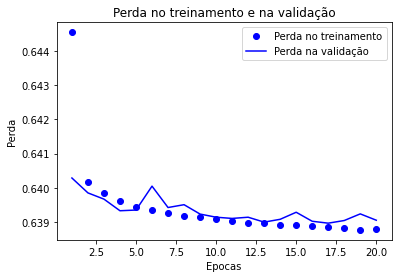

In [27]:
loss, val_loss, acc, val_acc = visualizar_dados.valor_accuracia(history_dict)

epochs = range(1, len(acc) + 1)
linhas = [[loss, 'bo', 'Perda no treinamento'],
          [val_loss, 'b', 'Perda na validação']]
titulos = {'title': 'Perda no treinamento e na validação',
           'xlabel': 'Epocas',
           'ylabel': 'Perda'
           }

visualizar_dados.visualizar_accuracia(epochs, linhas, titulos)


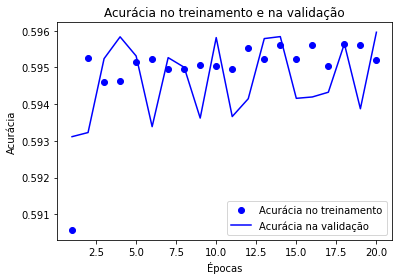

In [28]:
linhas = [[acc, 'bo', 'Acurácia no treinamento'],
          [val_acc, 'b', 'Acurácia na validação']]
titulos = {'title': 'Acurácia no treinamento e na validação',
           'xlabel': 'Épocas',
           'ylabel': 'Acurácia'
           }
visualizar_dados.visualizar_accuracia(epochs, linhas, titulos)


In [29]:
predicao_deep = model.predict(X_teste)
print("Accuracy: ", deep_learning.roc_auc(predicao_deep,y_teste))


# print("Auc: %.2f%%" % (deep_learning.roc_auc(predito,y_teste)))

Accuracy:  0.6589451122331106


# 5 - Contagem, vetor binário, TF-IDF, Matriz Esparsa


## Matriz Esparsa

A Matriz Esparsa é criada com base no vetor de palavras usando elas como caracteristicas para definir se é Positivo, Negativo ou neutro.

Nesse caso forçei somente as 50 palavras mais utilizadas.

Utilizei o conceito de **Bag-of-Words**, para gerar essa Matriz Esparsa

In [30]:
# vetorizar, bag_of_words = treinamento.vetorizar(tweets)
matriz_esparsa = treinamento.criar_matriz_esparsa(bag_of_words, vetorizar)

matriz_esparsa

,awesome,bad,bed,better,bit,feel,friend,fun,great,guy,...,wait,want,way,week,weekend,wish,work,yeah,year,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1599996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1599997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1599998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Contagem

Aqui fiz uma contagem simples das palavras por sentimentos **Positivo**, **Negativo** e **Neutro**, logo após fiz o cálculo para saber a dieferença entre eles.

In [31]:
count_words = tratar_dados.contar_palavras(tweets)
count_words_positivo    = tratar_dados.contar_palavras(tweets.query("Sentimento_Texto == 'positivo'"))
count_words_negativo    = tratar_dados.contar_palavras(tweets.query("Sentimento_Texto == 'negativo'"))
count_words_neutro      = tratar_dados.contar_palavras(tweets.query("Sentimento_Texto == 'neutro'"))

print('Contagem Positivos:',count_words_positivo)
print('Contagem Negativos:',count_words_negativo)
print('Contagem Neutros:',count_words_neutro)

#calculo da razão com smoothing (add-one)
ratio_pos = (count_words_positivo + 1) / (count_words_negativo + 1)
ratio_neg = (count_words_negativo + 1) / (count_words_positivo + 1)

print('ratio_pos, ratio_neg:', ratio_pos, ratio_neg)

Contagem Positivos: 5150900
Contagem Negativos: 5177620
Contagem Neutros: 0
ratio_pos, ratio_neg: 0.99483932871873 1.005187441964037


## TF-IDF

TF-IDF significa “Frequência do termo - Frequência inversa do documento”.

Esta é uma técnica para quantificar uma palavra em documentos, geralmente calculamos um peso para cada palavra que significa a importância da palavra no documento e no corpus.

Este método é uma técnica amplamente utilizada na Recuperação de Informação e Mineração de Texto.

### Todos Sentimentos

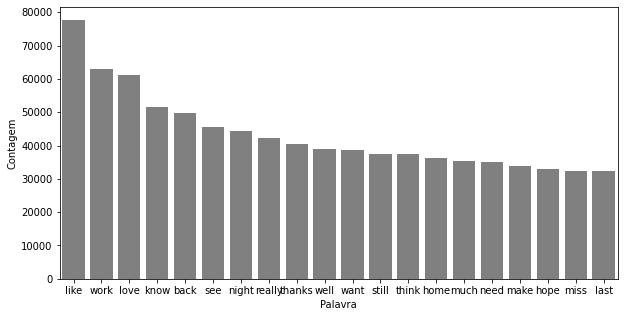

In [32]:
visualizar_dados.pareto(tweets, 'Texto', 20)

### Sentimentos Positivos

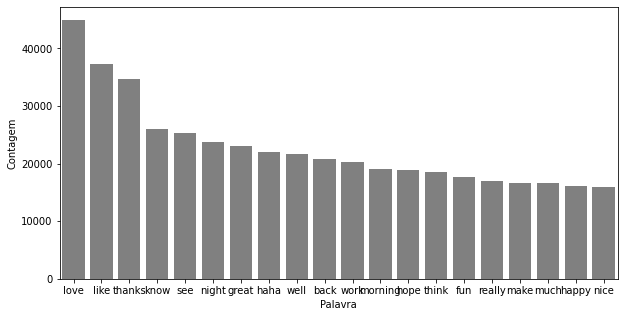

In [33]:
visualizar_dados.pareto(tweets.query("Sentimento_Texto == 'positivo'"), 'Texto', 20)

### Sentimentos Negativos

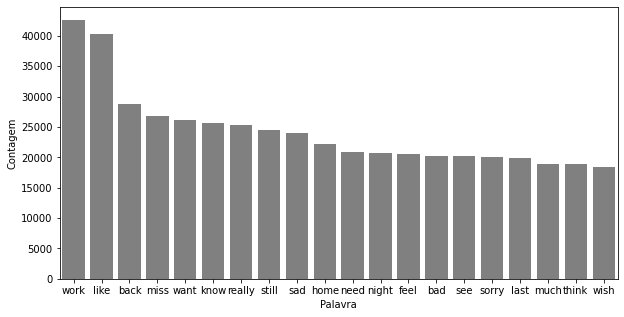

In [34]:
visualizar_dados.pareto(tweets.query("Sentimento_Texto == 'negativo'"), 'Texto', 20)

# 6 - Comparativo dos métodos de classificação utilizados. 
## Qual o melhor? 

### Naive Bayes

<pre>
Naive Bayes
Classificação: 
              precision    recall  f1-score   support

           0       0.56      0.81      0.67    239361
           1       0.67      0.38      0.48    240639

    accuracy                           0.59    480000
   macro avg       0.62      0.59      0.57    480000
weighted avg       0.62      0.59      0.57    480000

Score: 0.5938685613629313
</pre>
       
### Regressão Logistiva
<pre>
Regressão Logistica
Classificação: 
              precision    recall  f1-score   support

           0       0.57      0.80      0.66    239361
           1       0.66      0.39      0.49    240639

    accuracy                           0.59    480000
   macro avg       0.61      0.59      0.58    480000
weighted avg       0.61      0.59      0.58    480000

Score: 0.5945537755953508
</pre>

### Deep Learning
<pre>
   Accuracy:  0.6589451122331106
</pre>

## O que pode melhorar? 

Algumas palavras foram reovidas pois não haviam muito sentido na classificação, após apurar o dicionário mais palavra serão removidas pois não tem muita utilidade na classificação.

**Exemplo:**
<pre>
   amp, today, tomorrow, going, girl, tonight, getting, day, get, http, com, go, one, lol, quot, im, od, new, u, twitter, nna
</pre>

Palavras abreviadas também trazem confusão na hora de classificar pois trazem o mesmo sentido, mas são contados como palavras diferentes.

**Exemplo:**
<pre>
   he's        => he is
   there's     => there is
   We're       => We are
   That's      => That is
   won't       => will not
   they're     => they are
   Can't       => Cannot
   wasn't      => was not
   don\x89Ûªt  => do not
   aren't      => are not
   isn't       => is not
   What's      => What is
   haven't     => have not
   hasn't      => has not
   There's     => There is
   He's        => He is
   It's        => It is
   You're      => You are
</pre>